# Typology of AI Governance Models via PCA and Clustering

In [20]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data construction

In [15]:
data = pd.DataFrame({
    'Country': ['EU', 'US', 'China', 'Korea', 'UK', 'Japan'],
    'Centralization': [3, 1, 5, 3, 2, 2],         
    'Transparency': [5, 2, 1, 4, 3, 3],           
    'Accountability': [5, 2, 2, 3, 2, 2],         
    'Innovation_Support': [3, 5, 4, 4, 3, 4],     
    'Risk_Management': [5, 3, 3, 4, 3, 3],        
    'Stakeholder_Engagement': [5, 2, 1, 3, 3, 3], 
    'Technological_Capacity': [3, 4, 5, 5, 3, 4]  
})

## 2. Preprocessing: Standardization

In [16]:
features = data.columns[1:]
X = data[features]
X_scaled = StandardScaler().fit_transform(X)

## 3. Perform PCA (2D)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Country'] = data['Country']

## 4. KMeans clustering on PCA scores

In [21]:
os.environ["OMP_NUM_THREADS"] = "1"
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)

C:\Users\yhj59\miniconda3\envs\sophie\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 5. Component Loadings

In [27]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print(loadings)

                             PC1       PC2
Centralization         -0.038819  0.765871
Transparency            0.449373 -0.043229
Accountability          0.433980  0.244183
Innovation_Support     -0.341497 -0.106642
Risk_Management         0.424707  0.282794
Stakeholder_Engagement  0.466953 -0.135049
Technological_Capacity -0.305250  0.492305


## 6. PCA scatterplot with cluster coloring

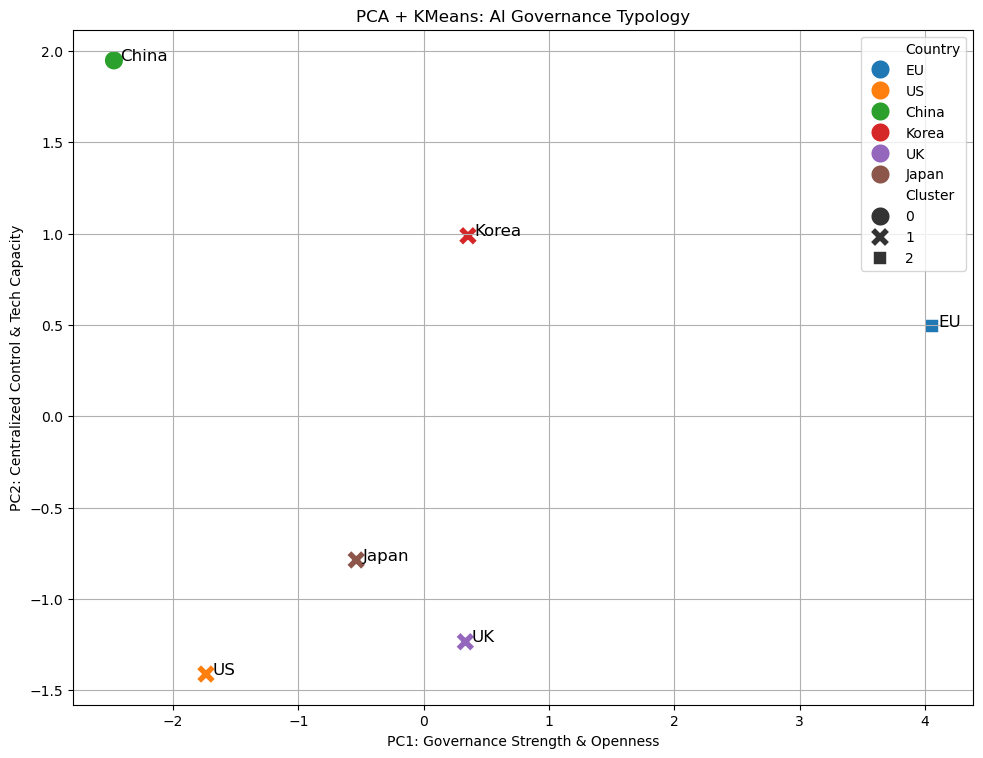

In [30]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Country', style='Cluster', s=200)

for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i]+0.05, pca_df['PC2'][i], pca_df['Country'][i], fontsize=12)
plt.title('PCA + KMeans: AI Governance Typology')
plt.xlabel('PC1: Governance Strength & Openness')
plt.ylabel('PC2: Centralized Control & Tech Capacity')
plt.grid(True)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.show()